In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model

In [3]:
classifier = Sequential()

In [4]:
classifier.add(Conv2D(filters = 32, kernel_size = 3, input_shape = (128,128,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [5]:
classifier.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [6]:
classifier.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
classifier.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [8]:
classifier.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [9]:
classifier.add(Flatten())
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=512, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=512, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1, activation='sigmoid'))

In [10]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory('train_set', target_size = (128, 128), batch_size = 32, class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test_set', target_size = (128, 128), batch_size = 32, class_mode = 'binary')

Found 7054 images belonging to 2 classes.
Found 1719 images belonging to 2 classes.


In [13]:
print(len(training_set))

221


In [14]:
print(len(test_set))

54


In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor= 'val_loss', patience=30), ModelCheckpoint('model3_checkpoint_05292022.h5', save_best_only=True)]

In [16]:
history = classifier.fit(training_set, epochs=200, validation_data=test_set, callbacks=callbacks)

Epoch 1/200
221/221 [==============================] - 992s 4s/step - loss: 0.6489 - accuracy: 0.6052 - val_loss: 0.5682 - val_accuracy: 0.7056
Epoch 2/200
221/221 [==============================] - 54s 243ms/step - loss: 0.5502 - accuracy: 0.7306 - val_loss: 0.4977 - val_accuracy: 0.7685
Epoch 3/200
221/221 [==============================] - 53s 238ms/step - loss: 0.5176 - accuracy: 0.7521 - val_loss: 0.4861 - val_accuracy: 0.7714
Epoch 4/200
221/221 [==============================] - 55s 247ms/step - loss: 0.4947 - accuracy: 0.7699 - val_loss: 0.4730 - val_accuracy: 0.7818
Epoch 5/200
221/221 [==============================] - 53s 240ms/step - loss: 0.4710 - accuracy: 0.7824 - val_loss: 0.4463 - val_accuracy: 0.7981
Epoch 6/200
221/221 [==============================] - 53s 241ms/step - loss: 0.4546 - accuracy: 0.7933 - val_loss: 0.4011 - val_accuracy: 0.8278
Epoch 7/200
221/221 [==============================] - 54s 242ms/step - loss: 0.4332 - accuracy: 0.8015 - val_loss: 0.5346 - v

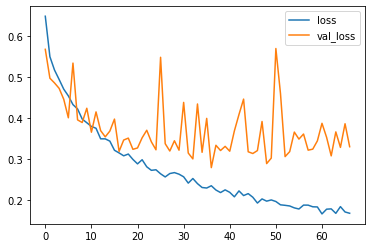

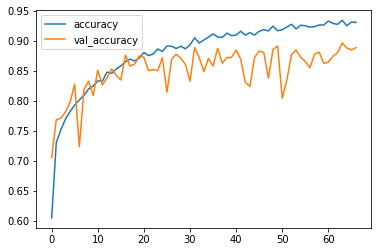

In [17]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

In [18]:
classifier.save('classify.h5')
classifier = load_model('classify.h5')

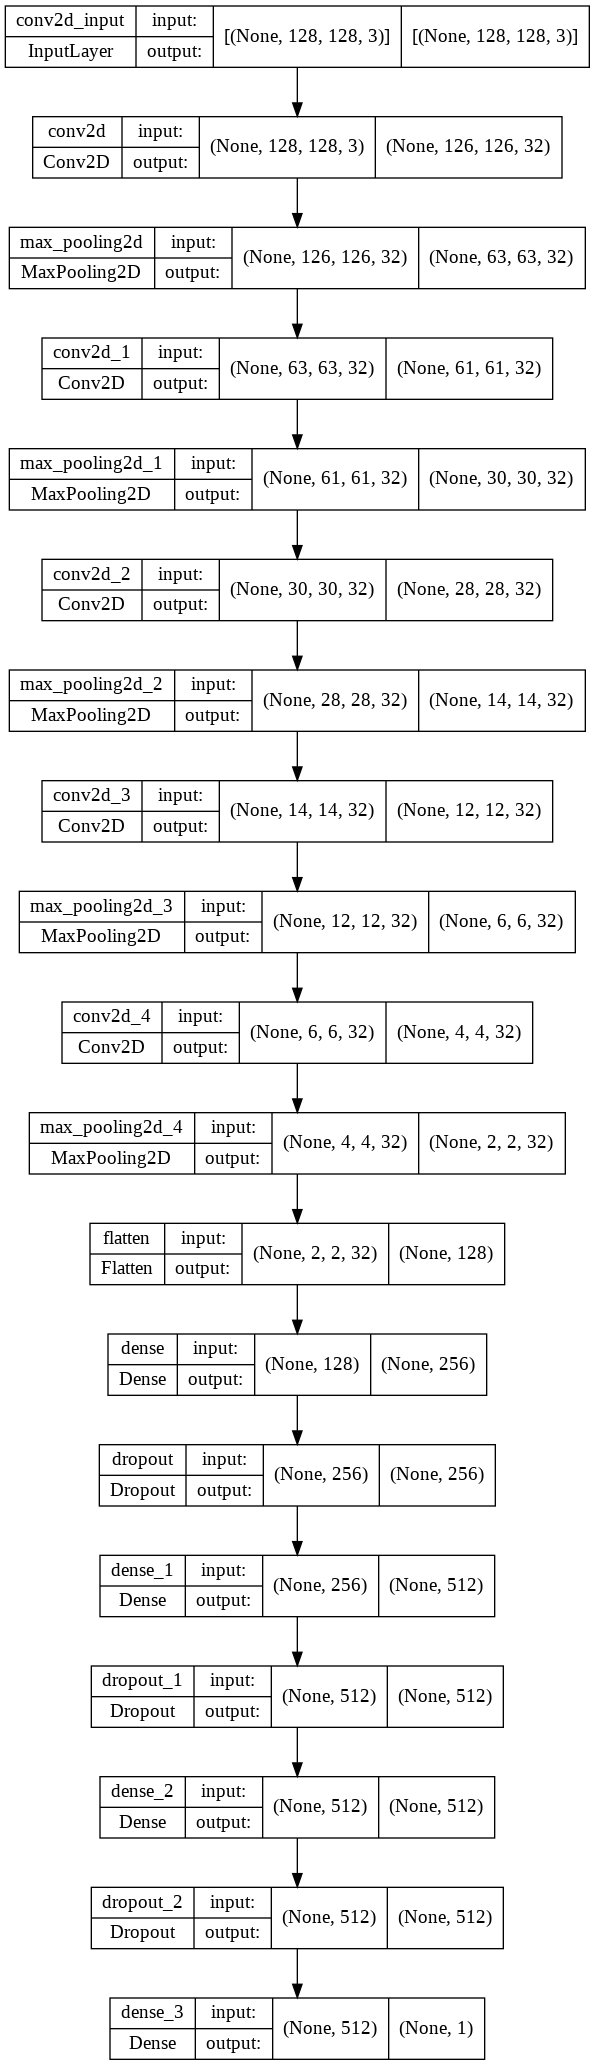

In [19]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(classifier, to_file='model_05292022.png', show_shapes=True)
Image(filename='model_05292022.png')

In [23]:
def print_result(test_image):
  test_image = image.img_to_array(test_image)
  print(test_image.shape)
  test_image = test_image/255
  test_image = np.expand_dims(test_image, axis = 0)
  print(test_image.shape)

  result = classifier.predict(test_image)
  print(result)
  if result[0][0] >= 0.5:
    prediction = 'Below is a Cartoon picture'
  else:
    prediction = 'Below is an Anime picture'
  print(prediction)

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(128, 128, 3)
(1, 128, 128, 3)
[[0.99999464]]
Below is a Cartoon picture
Populating the interactive namespace from numpy and matplotlib


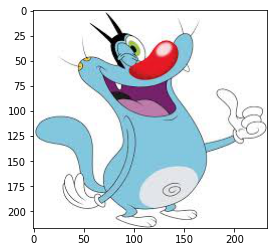

----------------------------------
(128, 128, 3)
(1, 128, 128, 3)
[[0.00015648]]
Below is an Anime picture
Populating the interactive namespace from numpy and matplotlib


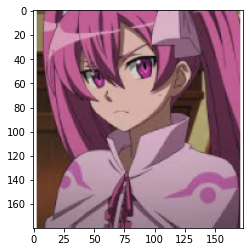

----------------------------------
(128, 128, 3)
(1, 128, 128, 3)
[[0.00011215]]
Below is an Anime picture
Populating the interactive namespace from numpy and matplotlib


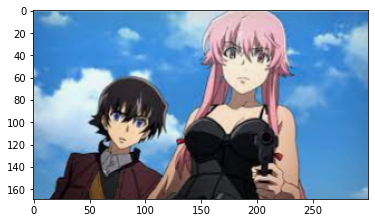

----------------------------------
(128, 128, 3)
(1, 128, 128, 3)
[[1.]]
Below is a Cartoon picture
Populating the interactive namespace from numpy and matplotlib


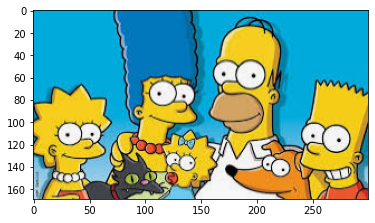

----------------------------------
(128, 128, 3)
(1, 128, 128, 3)
[[0.99477494]]
Below is a Cartoon picture
Populating the interactive namespace from numpy and matplotlib


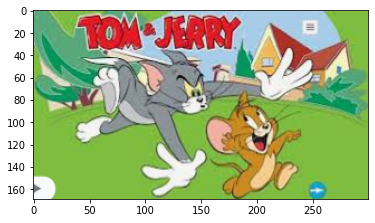

----------------------------------
(128, 128, 3)
(1, 128, 128, 3)
[[5.442172e-07]]
Below is an Anime picture
Populating the interactive namespace from numpy and matplotlib


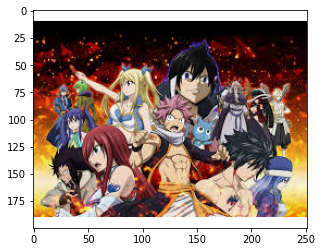

----------------------------------


In [24]:
i = 1
while i < 7:
  s = 'single_prediction/predict' + str(i) + '.png'
  i += 1
  test_image = image.load_img(s, target_size=(128, 128))
  print_result(test_image)
  %pylab inline
  img = mpimg.imread(s, 0)
  imgplot = plt.imshow(img)
  plt.show()
  print('----------------------------------')